<a href="https://colab.research.google.com/github/Kanishkar-git/DLT_LAB-Experiments/blob/master/DLT_EXP6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 447s 563ms/step - accuracy: 0.6944 - loss: 0.8925 - val_accuracy: 0.7825 - val_loss: 0.6262
Epoch 2/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 424s 542ms/step - accuracy: 0.8056 - loss: 0.5499 - val_accuracy: 0.7975 - val_loss: 0.5858
Epoch 3/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 437s 535ms/step - accuracy: 0.8285 - loss: 0.4863 - val_accuracy: 0.8096 - val_loss: 0.5657
Epoch 4/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 417s 504ms/step - accuracy: 0.8413 - loss: 0.4479 - val_accuracy: 0.8107 - val_loss: 0.5643
Epoch 5/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 411s 526ms/step - accuracy: 0.8592 - loss: 0.3958 - val_accuracy: 0.8078 - val_loss: 0.5763
313/313 ━━━━━━━━━━━━━━━━━━━━ 61s 195ms/step - accuracy: 0.8116 - loss: 0.5762
Test Accuracy: 0.81
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


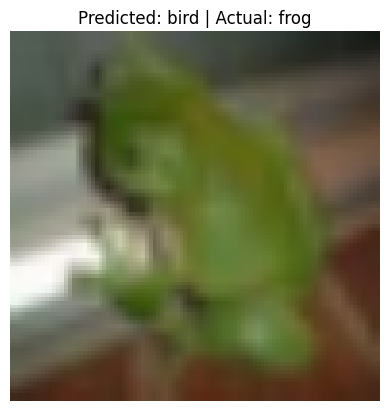

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Input
from tensorflow.keras.optimizers import Adam

# Step 1 & 2: Load and preprocess CIFAR-10 dataset
(X_train, y_train), (X_test, y_test) = cifar10.load_data()
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# Step 3: Resize images to 96x96 for MobileNetV2
X_train = tf.image.resize(X_train, [96, 96])
X_test = tf.image.resize(X_test, [96, 96])

# Step 4: Load pretrained MobileNetV2 without top layers
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(96, 96, 3))

# Step 5: Add custom classifier
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(128, activation='relu')(x)
output = Dense(10, activation='softmax')(x)
model = Model(inputs=base_model.input, outputs=output)

# Step 6: Freeze base model layers
for layer in base_model.layers:
    layer.trainable = False

# Step 7: Compile the model
model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

# Step 8: Train the model
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=5, batch_size=64)

# Step 9: Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy:.2f}")

# Step 10: Prediction and Visualization
class_names = ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

def predict_sample(index):
    sample = np.expand_dims(X_test[index], axis=0)
    prediction = model.predict(sample)
    pred_class = class_names[np.argmax(prediction)]
    actual_class = class_names[np.argmax(y_test[index])]
    plt.imshow(X_test[index])
    plt.title(f"Predicted: {pred_class} | Actual: {actual_class}")
    plt.axis('off')
    plt.show()

# Show prediction for one sample
predict_sample(7)

# Save model
model.save("transfer_learning_cifar10_model.h5")
